In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Read csv

In [4]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Taking some specific attributes

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Plotting

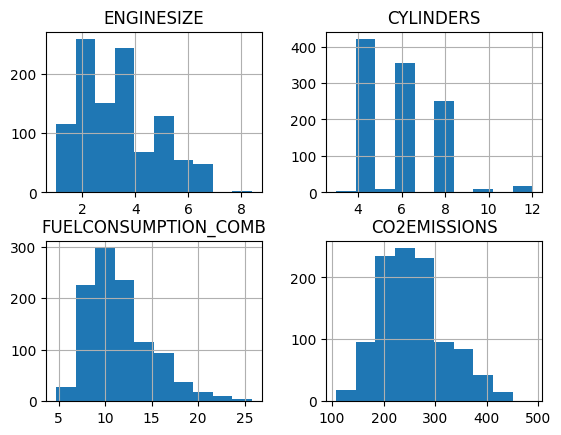

In [6]:
# viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
# viz.hist()
cdf.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

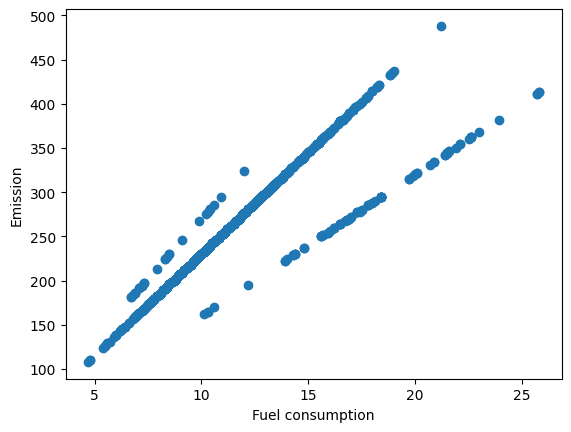

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel('Fuel consumption')
plt.ylabel('Emission')
plt.show()

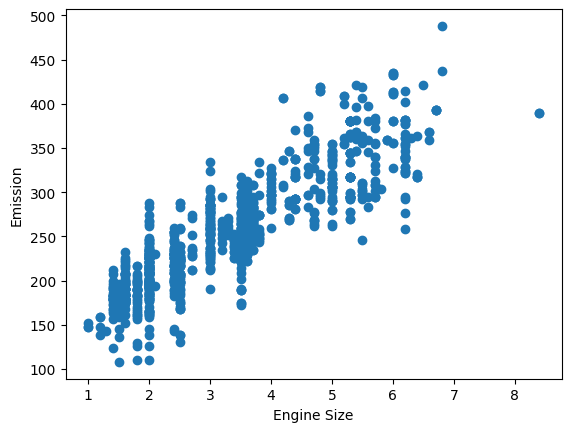

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

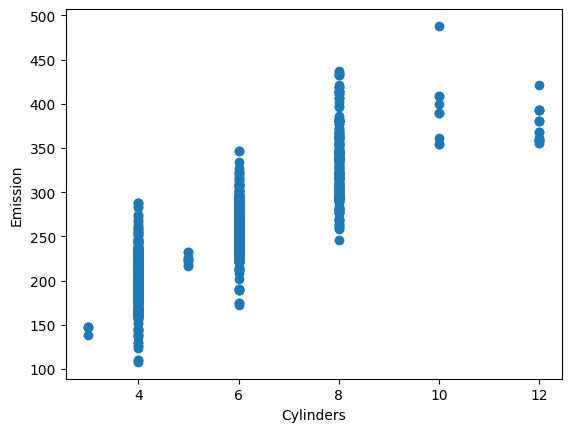

In [23]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()

Creating Test and Train dataset. Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


Modeling

In [1]:
from sklearn import linear_model

In [10]:
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(train_x, train_y)
print('Coefficient : ', regression.coef_, '\nIntercept: ', regression.intercept_)

Coefficient :  [[39.25721631]] 
Intercept:  [124.69242397]


In [12]:
print(regression.coef_[0])

[39.25721631]


<function matplotlib.pyplot.show(close=None, block=None)>

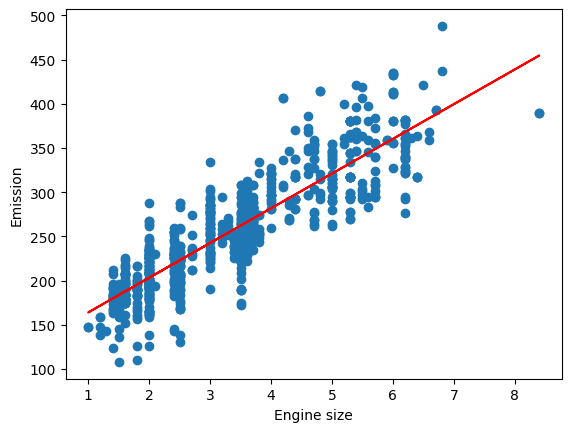

In [15]:
intercept = regression.intercept_[0]
coef = regression.coef_[0][0]
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(train_x, intercept+coef*train_x, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show

Evaluation matrix using MSE(Mean squared error)

In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_predicted = regression.predict(test_x)

print("Mean absolute error: %.2f" %  np.mean(np.absolute(test_y, test_y_predicted)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_predicted-test_y)**2))
print("R2-score: %.2f" % r2_score(test_y , test_y_predicted))

Mean absolute error: 255.90
Residual sum of squares (MSE): 0.00
R2-score: 1.00


Train using FUELCONSUMPTION_COMB feature

In [23]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(train_x, train_y)
coef_ = regression.coef_
intercept = regression.intercept_

In [24]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_predicted = regression.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_predicted-test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_predicted-test_y)**2))
print("R2-score: %.2f" % r2_score(test_y , test_y_predicted))

Mean absolute error: 19.74
Residual sum of squares (MSE): 779.81
R2-score: 0.80
